# Observação

<br>
<div style="background: black;border-left: 6px solid dodgerblue; box-shadow: 2px 2px 0px 0px black, outset 0px 0px 0px 2px black">
    <font color="lightskyblue">Esta análise consiste no desafio 5 presente no capítulo 7 do curso <b>Python: Fundamentos para Análise de Dados</b> disponibilizado gratuitamente pela <abbr title="Data Science Academy"><b>DSA</b></abbr>. O conteúdo do curso pode ser encontrado <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">neste link</a>.</font>
</div>

<hr>

## Missão: Analisar o Comportamento de Compra de Consumidores.

## Nível de Dificuldade: Alto (até o capítulo 7 do curso '-')

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

>**Contagem de Consumidores**

<input type='checkbox' checked>`  Número total de consumidores`</input>
<hr/>

>**Análise Geral de Compras**

<input type='checkbox' checked>`  Número de itens exclusivos`</input>

<input type='checkbox' checked>`  Preço médio de compra`</input>

<input type='checkbox' checked>`  Número total de compras`</input>

<input type='checkbox' checked>`  Rendimento total`</input>
<hr/>

>**Análise Demográfica**

<input type='checkbox' checked>`  Porcentagem e contagem de compradores masculinos`</input>

<input type='checkbox' checked>`  Porcentagem e contagem de compradores do sexo feminino`</input>

<input type='checkbox' checked>`  Porcentagem e contagem de outros / não divulgados`</input>
<hr/>

>**Análise de Compras Por Gênero**

<input type='checkbox' checked>`  Número de compras`</input>

<input type='checkbox' checked>`  Preço médio de compra`</input>

<input type='checkbox' checked>`  Valor Total de Compra`</input>

<input type='checkbox' checked><s>`  Compras for faixa etária`</s></input>
<hr/>

>**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**

<input type='checkbox' checked>`  Login`</input>

<input type='checkbox' checked>`  Número de compras`</input>

<input type='checkbox' checked>`  Preço médio de compra`</input>

<input type='checkbox' checked>`  Valor Total de Compra`</input>

<input type='checkbox' checked>`  Itens mais populares`</input>
<hr/>

>**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**

<input type='checkbox' checked>`  ID do item`</input>

<input type='checkbox' checked>`  Nome do item`</input>

<input type='checkbox' checked>`  Número de compras`</input>

<input type='checkbox' checked>`  Preço do item`</input>

<input type='checkbox' checked>`  Valor Total de Compra`</input>

<input type='checkbox' checked><s>`  Itens mais lucrativos`</s></input>
<hr/>

>**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**

<input type='checkbox' checked>`  ID do item`</input>

<input type='checkbox' checked>`  Nome do item`</input>

<input type='checkbox' checked>`  Número de compras`</input>

<input type='checkbox' checked>`  Preço do item`</input>

<input type='checkbox' checked>`  Valor Total de Compra`</input>
<hr/>


>**Visualização de Dados:**

<input type='checkbox' checked>`  Gráficos  Plots`</input>

<input type='checkbox' checked>`  Tabelas`</input>
<hr/>

>**Como considerações finais:**

<input type='checkbox' checked>`  Seu script deve funcionar para o conjunto de dados fornecido`</input>

<input type='checkbox' checked>`  Você deve usar a Biblioteca Pandas e o Jupyter Notebook.`</input>
<hr/>

# <font color='red'>Seu Código Começa Aqui</font>

# Procedimentos

Toda análise de dados possui um padrão de passos a serem seguidos a fim de facilitar o processamento e melhorar a precisão dos resultados obtidos de maneira produtiva e concisa.

* Entender o Problema (este passo já foi concluído com a atribuição da missão acima)
* Coleta de Dados (os dados para análise já estão extraídos e salvos no arquivo <a href="arquivos\dados_compras.json">arquivos\dados_compras.json</a>)
* Processamento dos Dados (iremos importar o arquivo e partir para a Análise Exploratória)
* Exploração dos Dados (verificaremos dados estatísticos bem como falhas nos dados por meio dos pacotes **pandas**, **matplotlib** e **seaborn**)
* Comunicação de Resultados (como trata-se apenas de um desafio de estudo, podemos pular este passo rsrs)
* Feedback (avaliação da análise e verificação se é necessário retornar à análise)

![Ciclo da Análise de Dados](arquivos/ciclo_data_science.jpg)

<hr>

## <font color="blue">0 - Funções</font>

Primeiramente, importamos o método `itemgetter` da biblioteaca operator para ordenação de listas de listas (resumidamente, uma lista que armazena outras listas, ou 'arrays' que armazenam outros 'arrays') que permite escolhermos a index da lista como base na ordenação em conjunto com a função built-in: `sorted`.

Também já criamos a função `porcentagem`, que servirá apenas para encontrar a porcentagem de um valor sobre o total (arredondamento de  casas decimais.

In [1]:
from operator import itemgetter
porcentagem = lambda parte, total: round(parte * 100 / total, 2)

## <font color="blue">1 - Importação das Bibiotecas e dos Dados</font>

Para facilitar o processo de análise, importamos as seguintes bibliotecas:

* `pandas` : manipulação dos dados por meio de tabelas (parecidas com excell);
* `matplotlib.pyplot` : visualização gráfica;
* `seaborn` : visualização gráfica.

Talvez você deve estar se perguntando: 'Qual a diferença do matplot com o seaborn?'. Bem, o matplot é aplicado com `gráficos estáticos` e apresenta layouts mais simples, enquanto que o seaborn fornece `gráficos interativos` e layouts mais modernos.

Sim, também poderíamos estar importando a biblioteca `numpy` para manipulação de arrays e matrizes, mas não convém a esta análise o uso direto dela (digo isso porque o pandas acessa a bilbioteca implicitamente quando necessário).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

In [3]:
log_compras = pd.read_json('arquivos\dados_compras.json')

### <font color="blue">2 - Preparação dos Dados</font>
Antes de iniciarmos a exploração, é preciso verificar se estamos trabalhando com campos em brancos/nulos, ou seja, se algum campo de meu conjunto está sem valor informado. Nestes casos, podemos estar aplicando uma das quatro técnicas a seguir para tratar tais 'anormalidades':

* `drop` : descartar as linhas que possuem pelo menos um campo nulo;
* `zerar` : informar valor 0 ou  ' ' nos campos nulos)
* `média`: preenchê-los com a média da coluna a qual pertencem;
* `mediana` : preenchê-los com a mediana.

**Obs.: Lógico que, além destas quatro mais simples, há outras técnicas mais eficazes para o tratamento.**

In [4]:
log_compras.isnull().sum()

Idade           0
Item ID         0
Login           0
Nome do Item    0
Sexo            0
Valor           0
dtype: int64

Felizmente tivemos o melhor caso: nenhum campo do dataset é nulo; no entanto, se esta não fosse a situação, poderíamos estar aplicando uma das quatro técnicas conforme demonstrado abaixo.

In [5]:
# log_compras.dropnan() >> drop das linhas com campos nulos

# log_compras[['Idade', 'Item ID', 'Valor']].fillna(0) >> preenchimento com zeros
# log_compras[['Login', 'Nome do Item', 'Sexo']].fillna('') >> preenchimento com string vazia

# log_compras['Idade'].fillna(log_compras['Idade'].mean()) >> preenchimento com a média
#                [...]
    
# log_compras['Idade'].fillna(log_compras['Idade'].median()) >> preenchimento com a mediana
#                [...]

## <font color="blue">3.0 - Análise Exploratória: Dados</font>

Beleza, agora já podemos partir para o entendimento da estrutura dos dados que estamos trabalhando. A fim de termos noção da magnitude do <abbr title='Conjunto de Dados'>dataset</abbr> que estamos analisando, primeiramente vamos verificar a quantidade de linhas e colunas presentes nele. Para isto, podemos estar utilizando o atributo `shape` da classe `DataFrame` do pandas, fornecendo o par: (quantidade de linhas, quantidade de colunas).

In [6]:
print('Linhas: %i\nColunas: %i' \
      % (log_compras.shape[0], log_compras.shape[1]))

Linhas: 780
Colunas: 6


<hr>

### <font color='blue'>- Variáveis</font>

Outro fator muito importante que precisamos ter conhecimento antes de iniciarmos qualquer análise é saber quais são as `variáveis` de nosso dataset, o que elas representam e informações estatísticas delas. Segue cada tópico:

`Dicionário das Variáveis:`

* `Idade`         : idade do consumidor
* `Item ID`       : código do produto comprado
* `Login`         : nome de usuário do consumidor
* `Nome do Item`  : descrição do produto
* `Sexo`          : sexo do consumidor
* `Valor`         : valor unitário do produto na compra

In [7]:
log_compras.head() # tráz os cinco primeiros registros

,Idade,Item ID,Login,Nome do Item,Sexo,Valor
0,38,165,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37
1,21,119,Eolo46,"Stormbringer, Dark Blade of Ending Misery",Masculino,2.32
2,34,174,Assastnya25,Primitive Blade,Masculino,2.46
3,21,92,Pheusrical25,Final Critic,Masculino,1.36
4,23,63,Aela59,Stormfury Mace,Masculino,1.27


In [8]:
# df.dtypes >> retorna dados das colunas menos detalhados
log_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
Idade           780 non-null int64
Item ID         780 non-null int64
Login           780 non-null object
Nome do Item    780 non-null object
Sexo            780 non-null object
Valor           780 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 36.6+ KB


In [9]:
log_compras.describe(include=["integer", "float"])
# count >>  quantidade de dados
# mean  >>  média
# std   >>  desvio padrão
# min   >>  valor mínimo
# 50%   >>  mediana
# max   >>  valor máximo

,Idade,Item ID,Valor
count,780.000000,780.000000,780.000000
mean,22.729487,91.293590,2.931192
std,6.930604,52.707537,1.115780
min,7.000000,0.000000,1.030000
25%,19.000000,44.000000,1.960000
50%,22.000000,91.000000,2.880000
75%,25.000000,135.000000,3.910000
max,45.000000,183.000000,4.950000


In [10]:
log_compras.describe(include="object")
# unique >>  dados exclusivos/únicos
# top    >>  moda
# freq   >>  frequência da moda

,Login,Nome do Item,Sexo
count,780,780,780
unique,573,179,3
top,Undirrala66,Final Critic,Masculino
freq,5,14,633


<hr>

### <font color="blue">- Distribuição e Correlação Numérica</font>

Próximo passo: verificar a `distribuição` dos dados numéricos (idade, item id e valor), bem como a `correlação` entre os tipos. Isso nos ajudará a entender onde estão os picos e os chãos de cada variável, além de verificar se o valor de uma variável influencia no valor da outra.

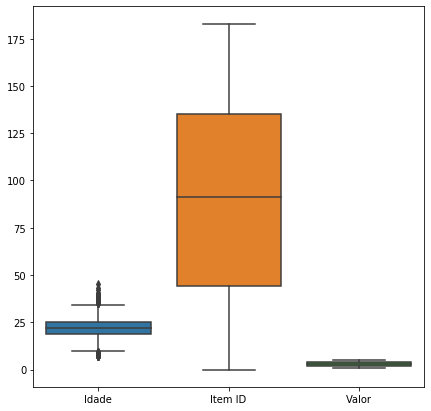

In [11]:
plt.figure(figsize=(7, 7))
sbs.boxplot(data=log_compras); # este ponto-e-vírgula evita que o endereço de memória de cada objeto do gráfico seja exibido
# sim, o ; existe em python, mas para algumas funções específicas '-'

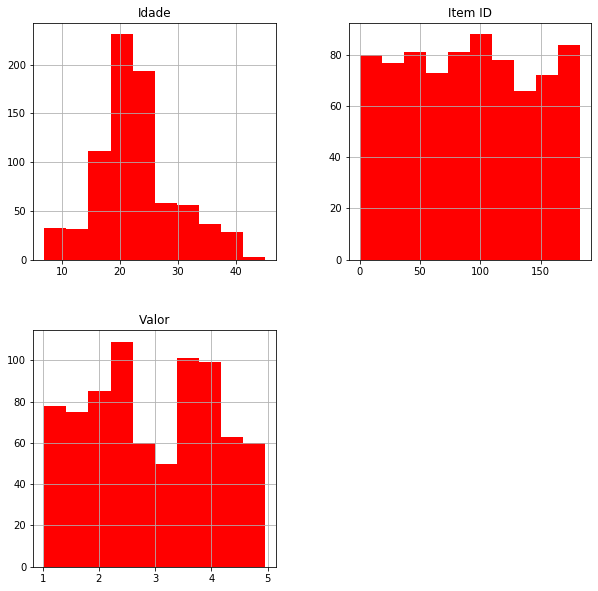

In [12]:
log_compras.hist(figsize=(10, 10), color='red');
# Eixo X >> Valor da Coluna
# Eixo Y >> Quantidade

In [13]:
log_compras.corr()

,Idade,Item ID,Valor
Idade,1.000000,0.087558,0.028214
Item ID,0.087558,1.000000,0.099170
Valor,0.028214,0.099170,1.000000


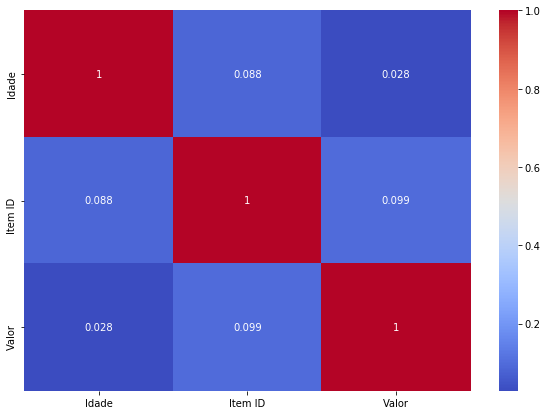

In [14]:
plt.figure(figsize=(10, 7))
sbs.heatmap(log_compras.corr(), annot=True, cmap='coolwarm');

<hr>

## <font color="blue">3.1 - Análise Exploratória: Hipóteses</font>

Após a Análise Exploratória, podemos ter as seguintes deduções:
</br>

`Hipóteses/Deduções:`

    
> foram efetuadas **780 vendas**, sendo **633 de homens (81.15%)**

> das 780 vendas, **573** são de **usuários diferentes**

> os princiais consumidores têm entre **19 - 25 anos**, enquanto que os menos ativos têm **mais de 40 anos**

> a média da idade dos consumidores é de **22 anos (público jovem)**

> os produtos estão na margem de **2.50, 3.50 e 4.00 dólares**

> a média do vaor unitário dos produtos é de **2.93 dólares**

> a idade do consumidor **não** influencia no valor da venda, pois a correlação entre elas é de **0.028**

<hr>

## <font color="blue">4 - Extração de Insights (resolvendo cada tópico do desafio)</font>

### <font color="blue">- Contagem de Consumidores</font>

Vamos verificar quantas compras foram efetuadas e comparar com a quantidade total de consumidores diferentes. A fim de facilitar a visualização, um gráfico de barras foi construído.

In [15]:
contagem_consumidores = [
    ['Total de Compras', 'Consumidores Diferentes'],
    [log_compras['Login'].count(), len(list(log_compras['Login'].unique()))]
]

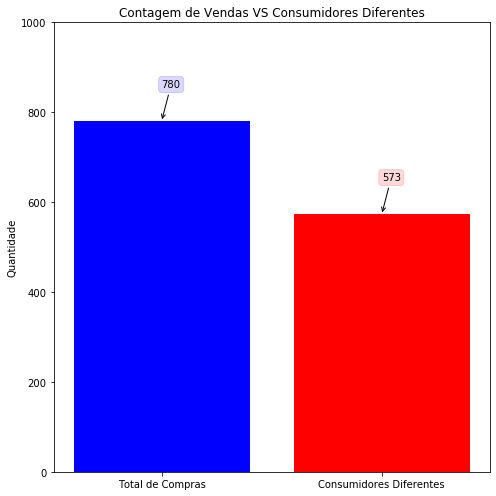

In [16]:
# Montagem do Gráfico de Barras

# plano #
plt.figure(figsize=(7, 7))

# títulos #
plt.title('Contagem de Vendas VS Consumidores Diferentes')
plt.xlabel('')
plt.ylabel('Quantidade')

# limites do eixo y >> quantidade #
plt.ylim(0, 1000)

# montagem do gráfico
plt.bar(contagem_consumidores[0], contagem_consumidores[1], 0.8, color=["blue", "red"]) # terceiro parâmetro corresponde ao comprimento
# da barra

# comentários #
# total de compras
plt.annotate(contagem_consumidores[1][0],                             # texto
            xy=(0, contagem_consumidores[1][0]),                      # posição do conteúdo comentado
            xycoords='data',                                          # posição de referência ao conteúdo comentado
            xytext=(0, contagem_consumidores[1][0] + 75),             # posição do texto
            textcoords='data',                                        # posição de referência ao texto
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), # layout da seta indicadora da referência  
            bbox=dict(boxstyle="round", color='blue', alpha=0.15))    # estilo da seta indicadora

# consumidores diferentes
plt.annotate(contagem_consumidores[1][1],
            xy=(1, contagem_consumidores[1][1]),
            xycoords='data',
            xytext=(1, contagem_consumidores[1][1] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color="red", alpha=0.15))

# definição do layout responsivo #
plt.tight_layout()

### <font color="blue">- Geral das Compras</font>

Agora, traçamos o paralelo entre a quantidade de cmpras com a quantidade de produtos diferentes vendidos, além de verificar o valor médio de cada compra vom o rendimento total das 780 vendas. Aplicaremos o gráfico de barras para visualização.

In [17]:
contagem_compras = [
    ['Total de Compras', 'Produtos Diferentes'],
    [contagem_consumidores[1][0], len(list(log_compras['Nome do Item'].unique()))]
]

rendimento = log_compras['Valor'].sum()
media = log_compras['Valor'].mean()
creditos = [rendimento, media]

Rendimento Total: R$ 2286.33
Valor Médio de cada Compra: R$ 2.93


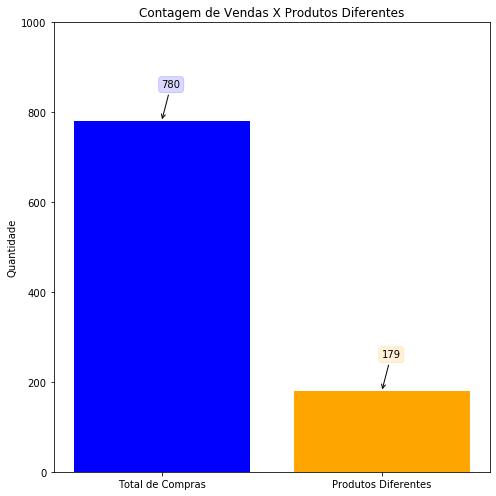

In [18]:
# Exibição dos créditos
print('Rendimento Total: R$ %.2f' % (creditos[0]))
print('Valor Médio de cada Compra: R$ %.2f' % (creditos[1]))

# Montagem do Gráfico: Qnt Vendas X Qnt Produtos Diferentes

plt.figure(figsize=(7, 7))

plt.title('Contagem de Vendas X Produtos Diferentes')
plt.ylabel('')
plt.ylabel('Quantidade')

plt.ylim(0, 1000)

plt.bar(contagem_compras[0], contagem_compras[1], color=['blue', 'orange'])

# consumidores diferentes
plt.annotate(contagem_compras[1][0],
            xy=(0, contagem_consumidores[1][0]),
            xycoords='data',
            xytext=(0, contagem_consumidores[1][0] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color="blue", alpha=0.15))

plt.annotate(contagem_compras[1][1],
            xy=(1, contagem_compras[1][1]),
            xycoords='data',
            xytext=(1, contagem_compras[1][1] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='orange', alpha=0.15))

plt.tight_layout()

### <font color="blue">- Demografia</font>

Análise da porcentagem dos consumidores classificando-os pelo sexo.

In [19]:
quantidade_sexo = [
    log_compras['Sexo'][log_compras['Sexo'] == 'Masculino'].count(),
    log_compras['Sexo'][log_compras['Sexo'] == 'Feminino'].count(),
    log_compras['Sexo'][log_compras['Sexo'] != 'Masculino'][log_compras['Sexo'] != 'Feminino'].count()
]

valor_medio = [
    round(log_compras['Valor'][log_compras['Sexo'] == 'Masculino'].mean(), 2),
    round(log_compras['Valor'][log_compras['Sexo'] == 'Feminino'].mean(), 2),
    round(log_compras['Valor'][log_compras['Sexo'] != 'Masculino'][log_compras['Sexo'] != 'Feminino'].mean(), 2)
]

valor_total = [
    round(log_compras['Valor'][log_compras['Sexo'] == 'Masculino'].sum(), 2),
    round(log_compras['Valor'][log_compras['Sexo'] == 'Feminino'].sum(), 2),
    round(log_compras['Valor'][log_compras['Sexo'] != 'Masculino'][log_compras['Sexo'] != 'Feminino'].sum(), 2)
]

In [20]:
contagem_sexo = [
    ['Masculino', 'Feminino', 'Outros'], # identificação do sexo
    quantidade_sexo, # quantidade
    list(map(porcentagem, quantidade_sexo, [contagem_consumidores[1][0]] * 3)), # porcentagem (último parâmetro
# consiste no total d consumidores: 780
    valor_medio, # preço médio
    valor_total # valor total da compra
]

### <font color='blue'>- Gráfico Qnt de Consumidores por Sexo</font>

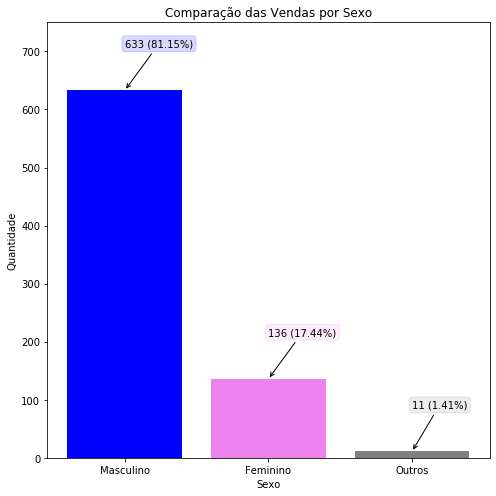

In [21]:
plt.figure(figsize=(7, 7))
plt.title('Comparação das Vendas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

plt.ylim(0, 750)

plt.bar(contagem_sexo[0], contagem_sexo[1], color=['blue', 'violet', 'gray'])

plt.annotate(str(contagem_sexo[1][0]) + ' (' + str(contagem_sexo[2][0]) + '%)',
            xy=(0, contagem_sexo[1][0]),
            xycoords='data',
            xytext=(0, contagem_sexo[1][0] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='blue', alpha=0.15))

plt.annotate(str(contagem_sexo[1][1]) + ' (' + str(contagem_sexo[2][1]) + '%)',
            xy=(1, contagem_sexo[1][1]),
            xycoords='data',
            xytext=(1, contagem_sexo[1][1] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='violet', alpha=0.15))

plt.annotate(str(contagem_sexo[1][2]) + ' (' + str(contagem_sexo[2][2]) + '%)',
            xy=(2, contagem_sexo[1][2]),
            xycoords='data',
            xytext=(2, contagem_sexo[1][2] + 75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='gray', alpha=0.15))

plt.tight_layout()

### <font color='blue'>- Gráfico Valor Total de Compras por Sexo</font>

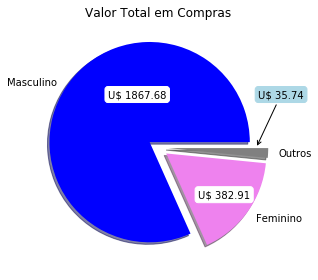

In [22]:
plt.title('Valor Total em Compras')

plt.pie(contagem_sexo[4], labels=contagem_sexo[0], 
        explode=[0.1, 0.1, 0.1] ,colors=['blue', 'violet', 'gray'], 
        shadow=True)

plt.annotate('U$ ' + str(contagem_sexo[4][0]),
            xy=(0, 0),
            xycoords='data',
            xytext=(-0.5, 0.5),
            textcoords='data',
            bbox=dict(boxstyle='round', color='white', alpha=1))

plt.annotate('U$ ' + str(contagem_sexo[4][1]),
            xy=(0, 0),
            xycoords='data',
            xytext=(0.4,-0.5),
            textcoords='data',
            bbox=dict(boxstyle='round', color='white', alpha=1))

plt.annotate('U$ ' + str(contagem_sexo[4][2]),
            xy=(0.98, 0),
            xycoords='data',
            xytext=(1, 0.5),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='lightblue', alpha=1))


plt.tight_layout()

### <font color='blue'>- Gráfico Valor Médio de Compra por Sexo</font>

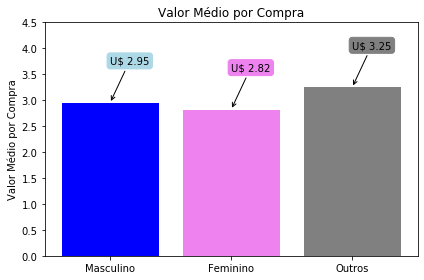

In [23]:
plt.title('Valor Médio por Compra')
plt.ylabel('Valor Médio por Compra')
plt.ylim(0, 4.5)

plt.bar(contagem_sexo[0], contagem_sexo[3], color=['blue', 'violet', 'gray'])

plt.annotate('U$ ' + str(contagem_sexo[3][0]),
            xy=(0, contagem_sexo[3][0]),
            xycoords='data',
            xytext=(0, contagem_sexo[3][0] + 0.75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='lightblue', alpha=1))

plt.annotate('U$ ' + str(contagem_sexo[3][1]),
            xy=(1, contagem_sexo[3][1]),
            xycoords='data',
            xytext=(1, contagem_sexo[3][1] + 0.75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='violet', alpha=1))

plt.annotate('U$ ' + str(contagem_sexo[3][2]),
            xy=(2, contagem_sexo[3][2]),
            xycoords='data',
            xytext=(2, contagem_sexo[3][2] + 0.75),
            textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            bbox=dict(boxstyle='round', color='gray', alpha=1))

plt.tight_layout()

### <font color='blue'>- Top 5 Consumidores</font>

In [24]:
sort = log_compras.sort_values(by='Login') # dataframe ordenado por meio do login (alfabética)

consumidores_nao_estruturados = [
    [], # login
    [], # qnt de compras
    [], # valor médio
    [], # valor total
    [] # itens comprados
]

consumidores_estruturados = []
top5_consumidores = []

In [25]:
# Extração dos Logins
consumidores_nao_estruturados[0] = list(sort['Login'].unique())

# Extração das qnts de compras por login
consumidores_nao_estruturados[1] = list(sort.groupby('Login').count()['Valor'])

# Valor Médio das Compras
consumidores_nao_estruturados[2] = list(sort.groupby('Login').mean()['Valor'])

# Valor Total das Compras
consumidores_nao_estruturados[3] = list(sort.groupby('Login').sum()['Valor'])

# Itens Comprados
lista_produtos = []

for consumidor in consumidores_nao_estruturados[0]:
    lista_produtos.append(
        list(
            sort[sort['Login'] == consumidor]['Nome do Item']
        )
    )
    
consumidores_nao_estruturados[4] = lista_produtos

In [26]:
# Estruturação dos dados (relacionar cada dado entre si)
for coluna in range(0, len(consumidores_nao_estruturados[0])):
    consumidor = [
        consumidores_nao_estruturados[0][coluna],
        consumidores_nao_estruturados[1][coluna],
        consumidores_nao_estruturados[2][coluna],
        consumidores_nao_estruturados[3][coluna],
        consumidores_nao_estruturados[4][coluna]
    ]
    
    consumidores_estruturados.append(consumidor)

In [27]:
# Ordenação dos dados pela quantidade de compras (decrescente)
consumidores_estruturados.sort(key=itemgetter(1), reverse=True)

# Extração do Top 5 Consumidores
for i in range(0, 5):
    top5_consumidores.append(consumidores_estruturados[i])
    
top5_consumidores

[['Undirrala66',
  5,
  3.412,
  17.06,
  ["Faith's Scimitar",
   'Piece Maker',
   'Spectral Diamond Doomblade',
   'Torchlight, Bond of Storms',
   'Blood Infused Guardian']],
 ['Hailaphos89',
  4,
  1.4675,
  5.87,
  ['Trickster', 'Netherbane', 'Unending Tyranny', 'Nirvana']],
 ['Mindimnya67',
  4,
  3.185,
  12.74,
  ['Devine', 'Striker', 'Fiery Glass Crusader', 'Thunderfury Scimitar']],
 ['Qarwen67',
  4,
  2.4924999999999997,
  9.969999999999999,
  ['Azurewrath',
   'Conqueror Adamantite Mace',
   'The Void, Vengeance of Dark Magic',
   'Relentless Iron Skewer']],
 ['Saedue76',
  4,
  3.39,
  13.56,
  ['Ritual Mace', 'Serenity', 'Striker', 'Thorn, Satchel of Dark Souls']]]

In [28]:
pd.DataFrame(top5_consumidores, [0, 1, 2, 3, 4], ['Login', 'Compras', 'Valor Médio', 'Valor Total', 'Produtos'])

,Login,Compras,Valor Médio,Valor Total,Produtos
0,Undirrala66,5,3.4120,17.06,"[Faith's Scimitar, Piece Maker, Spectral Diamo..."
1,Hailaphos89,4,1.4675,5.87,"[Trickster, Netherbane, Unending Tyranny, Nirv..."
2,Mindimnya67,4,3.1850,12.74,"[Devine, Striker, Fiery Glass Crusader, Thunde..."
3,Qarwen67,4,2.4925,9.97,"[Azurewrath, Conqueror Adamantite Mace, The Vo..."
4,Saedue76,4,3.3900,13.56,"[Ritual Mace, Serenity, Striker, Thorn, Satche..."


### <font color='blue'>- Top 5 Itens Mais Vendidos</font>

In [29]:
sort = log_compras.sort_values(by='Nome do Item')

itens_nao_estruturados = [
    [], # id
    [], # nome do item
    [], # qnt de compras
    [], # preço do item
    [] # somatório do valor total das compras
]
itens_estruturados, top5_itens_populares, top5_itens_lucrativos = [], [], []

In [30]:
# Extração dos dados não estruturados
itens_nao_estruturados[0] = list(sort['Item ID'].unique())
del itens_nao_estruturados[0][179:] # alguns produtos tiveram seus códigos duplicados, logo, é preciso excluir tais duplicidades

itens_nao_estruturados[1] = list(sort['Nome do Item'].unique())
itens_nao_estruturados[2] = list(sort.groupby('Nome do Item').count()['Valor'])
itens_nao_estruturados[4] = sort.groupby('Nome do Item').sum()['Valor']

In [31]:
# Exração do preço de cada item
lista_valores_nao_arredondados = []
lista_valores_arredondados = []

# Valores nao arredondados
for nome_do_item in itens_nao_estruturados[1]: 
    lista_valores_nao_arredondados.append(list(sort[sort['Nome do Item'] == nome_do_item]['Valor'].unique()))

# Valores arredondados com 2 casas decimais
for index_primaria in range(0, len(lista_valores_nao_arredondados)):
    for index_secundaria in range(0, len(lista_valores_nao_arredondados[index_primaria])):
        lista_valores_arredondados.append(
            int(lista_valores_nao_arredondados[index_primaria][index_secundaria])
        )
        
# Alguns dos produtos tiveram alteração cadastral de preços, ou seja, têm mais de um preço
# a fim de saber quais produtos tiveram tal alteração, foi permanecida todas as alterações
itens_nao_estruturados[3] = lista_valores_nao_arredondados

In [32]:
# Estruturação dos Itens
for numero_item in range(0, len(itens_nao_estruturados[0])):
    item = [
        itens_nao_estruturados[0][numero_item],
        itens_nao_estruturados[1][numero_item],
        itens_nao_estruturados[2][numero_item],
        itens_nao_estruturados[3][numero_item],
        itens_nao_estruturados[4][numero_item]
    ]
    itens_estruturados.append(item)

In [33]:
top5_itens_lucrativos = itens_estruturados
top5_itens_populares = itens_estruturados

top5_itens_lucrativos.sort(key=itemgetter(4), reverse=True)
top5_itens_populares.sort(key=itemgetter(2), reverse=True)

top5_itens_lucrativos = top5_itens_lucrativos[0:5]
top5_itens_populares = top5_itens_populares[0:5]

In [34]:
pd.DataFrame(top5_itens_populares, [x for x in range(0,5)], ['Item ID', 'Nome do Item', 'Qnt Compras', 'Preço', 'Lucro'])

,Item ID,Nome do Item,Qnt Compras,Preço,Lucro
0,145,Final Critic,14,"[4.62, 1.3599999999999999]",38.60
1,39,"Betrayal, Whisper of Grieving Widows",11,[2.35],25.85
2,84,Arcane Gem,11,[2.23],24.53
3,107,Stormcaller,10,"[2.7800000000000002, 4.15]",34.65
4,176,Retribution Axe,9,[4.14],37.26


### <font color='blue'>- Top 5 Itens mais Lucrativos (coincidentemente, são os mesmos produtos mais populares)</font>

In [35]:
pd.DataFrame(top5_itens_lucrativos, [x for x in range(0,5)], ['Item ID', 'Nome do Item', 'Qnt Compras', 'Preço', 'Lucro'])

,Item ID,Nome do Item,Qnt Compras,Preço,Lucro
0,145,Final Critic,14,"[4.62, 1.3599999999999999]",38.60
1,39,"Betrayal, Whisper of Grieving Widows",11,[2.35],25.85
2,84,Arcane Gem,11,[2.23],24.53
3,107,Stormcaller,10,"[2.7800000000000002, 4.15]",34.65
4,176,Retribution Axe,9,[4.14],37.26


<hr>

## <font color='blue'>5 - Migrando Dados ao MongoDB</font>

MongoDB consiste num banco de dados `nosql orientado a documentos` e muito útil para armazenar logs, consequentemente, iremos salvar todos os logs dde compras contidos no arquivo de análise numa coleção do banco. Para tal finalidade, utilizaremos a biblioteca `pymongo` para comunicação com o banco de dados, e a `json`, para leitura rápida do arquivo.

In [36]:
from pymongo import MongoClient
import pymongo

import json

In [37]:
conexao = MongoClient('localhost', 27017)
banco_dados = conexao["log_compras"]
colecao = banco_dados["desafio_dsa"]

In [ ]:
with open('arquivos\dados_compras.json', 'r', newline='') as logs:
    compras = logs.read()
    dados = json.loads(compras)

ids = colecao.insert_many(dados)

# exibindo ids dos documentos inseridos
print(ids.inserted_ids)

In [110]:
colecao.close
banco_dados.close
conexao.close()